In [131]:
# import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [132]:
# read the data and the feature info
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [133]:
# create a function that show feature description
def feat_desc(f):
    print(df_info.loc[f]['Description'])

In [134]:
# check df_info
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [135]:
# check the feature and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Our label will be 'loan_status'

## Exploratory Data Analysis

In [136]:
# check the description of 'loan_status'
feat_desc('loan_status')

Current status of the loan


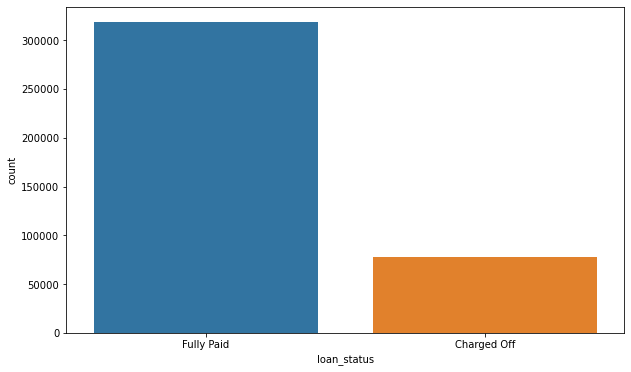

In [137]:
# check the count betwwn two groups
plt.figure(figsize=(10,6))
sns.countplot(df['loan_status'])
plt.show()

In [138]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

As we can see, the data target is quite imbalance, but lets continoue!

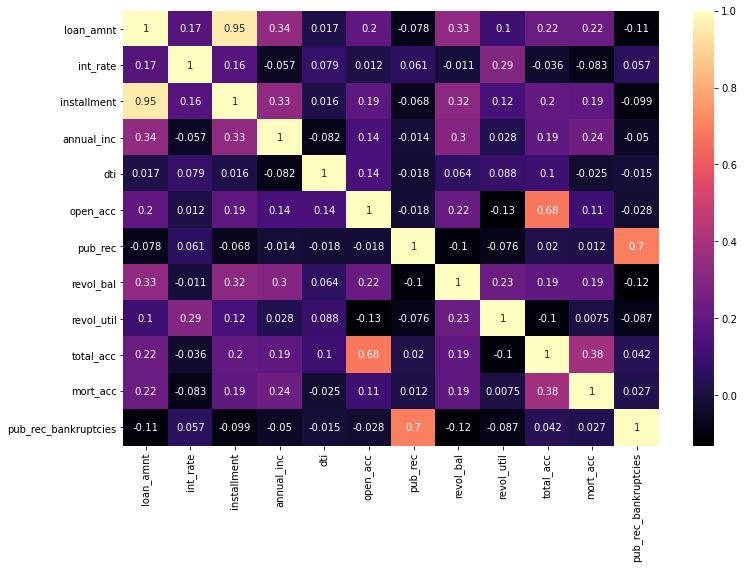

In [139]:
# create heatmap to find features that have correlation to each others
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show()

It seems that 'loan_amnt' and 'installment' is stongly correlated.

In [140]:
# check the description of 'loan_amnt'
feat_desc('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [141]:
# check the description of 'installment'
feat_desc('installment')

The monthly payment owed by the borrower if the loan originates.


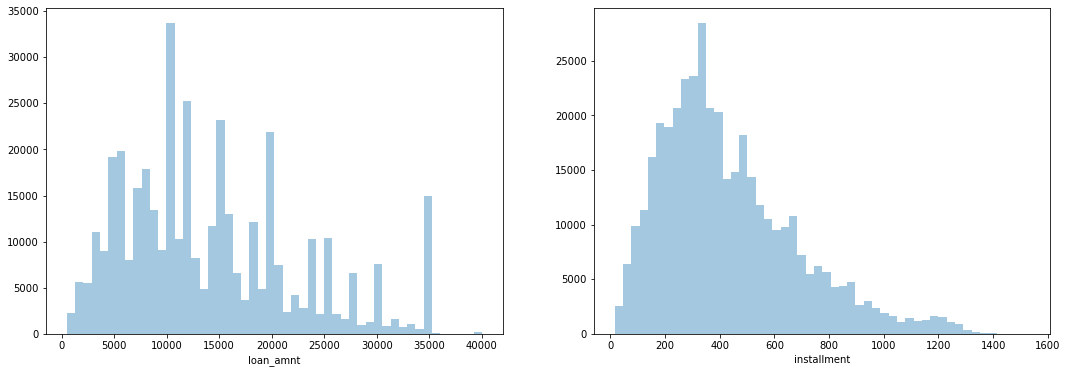

In [142]:
# create the distibution plot for the two features
fig1, ax = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df['loan_amnt'],kde=False,bins=50,ax=fig1.axes[0])
sns.distplot(df['installment'],kde=False,bins=50,ax=fig1.axes[1])
plt.show()

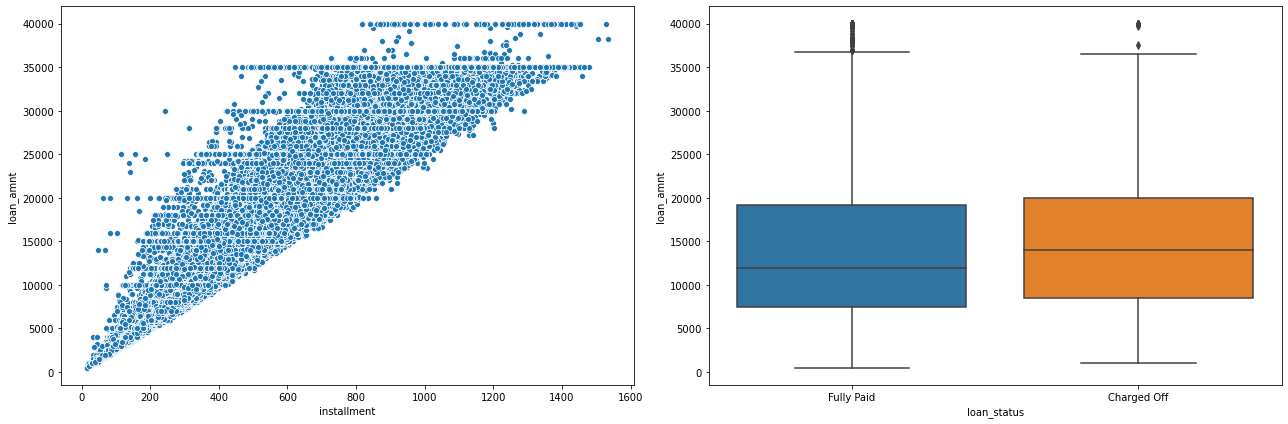

In [143]:
# create the scatter plot between 'loan_amnt' and installment
# create the box plot for 'loan_amnt', separate by 'loan_status'
fig2, ax = plt.subplots(1,2,figsize=(18,6))
sns.scatterplot('installment','loan_amnt',data=df,ax=fig2.axes[0])
sns.boxplot('loan_status','loan_amnt',data=df,ax=fig2.axes[1])
plt.tight_layout()
plt.show()

In [144]:
# get the the data stat summary of the 'loan_amnt' by 'loan_status'
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [145]:
# check the unique value of 'grade', sorted by the name
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [146]:
# check the unique value of 'sub_grade', sorted by the name
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

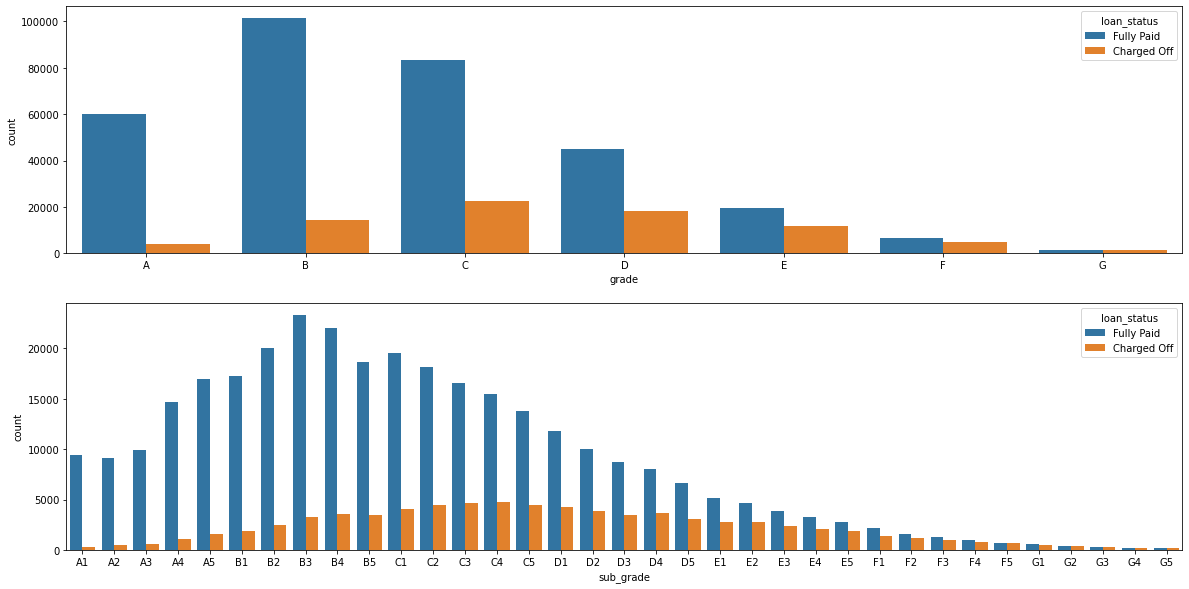

In [147]:
# create the count plot for 'grade' and sub_grade
# separate by 'loan_status'
fig3, ax = plt.subplots(2,1,figsize=(20,10))
sns.countplot(df['grade'],hue=df['loan_status'],order=sorted(df['grade'].unique()),ax=fig3.axes[0])
sns.countplot(df['sub_grade'],hue=df['loan_status'],order=sorted(df['sub_grade'].unique()),ax=fig3.axes[1])
plt.show()

From the above chart, as the sub_grade entering the F class, the borrower has a high tendency not to pay the loan.

In [148]:
# is there any null value of the 'loan_status'
df['loan_status'].isnull().sum()

0

In [149]:
# change the two groups into numeric value
# 1 : Fully Paid
# 0 : Charge Off
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [150]:
# check the final unique value of 'loan_status'
df['loan_status'].unique()

array([1, 0], dtype=int64)

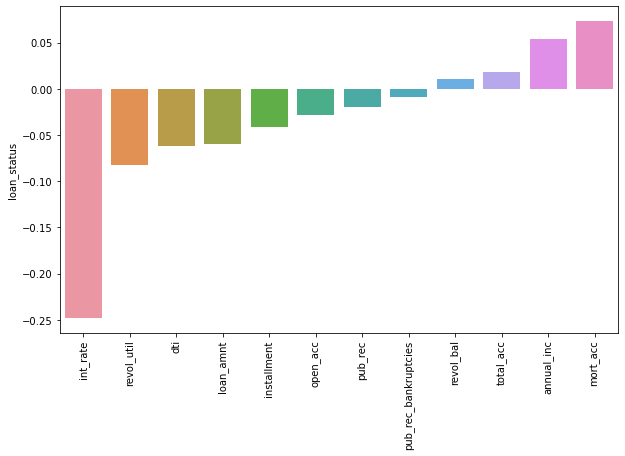

In [151]:
# get the distribution of correlation value between 'loan_status' and other features
plt.figure(figsize=(10,6))
sns.barplot(x=df.corr()['loan_status'].sort_values(ascending=True).drop('loan_status').index,y=df.corr()['loan_status'].sort_values(ascending=True).drop('loan_status'))
plt.xticks(rotation=90)
plt.show()

'int_rate' and 'mort_acc' have the highest correlation value among the others.

## Dealing with Missing Data

In [152]:
# is the null value exist?
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [153]:
# calculate the null rate for each features
for i in df.columns:
    null_rate = df[i].isnull().sum()/len(df)*100
    if null_rate > 0:
        print(f"{i}'s null rate: {round(null_rate,2)}% ({df[i].dtypes})")

emp_title's null rate: 5.79% (object)
emp_length's null rate: 4.62% (object)
title's null rate: 0.44% (object)
revol_util's null rate: 0.07% (float64)
mort_acc's null rate: 9.54% (float64)
pub_rec_bankruptcies's null rate: 0.14% (float64)


In [154]:
# check the description of 'emp_title'
feat_desc('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [155]:
# check the count of the unique value in 'emp_title'
df['emp_title'].nunique()

173105

The unique value is too many to get the dummy variable, it is better to drop the feature.

In [156]:
# drop 'emp_title' column
df.drop('emp_title',axis=1,inplace=True)

In [157]:
# check the description of 'emp_length'
feat_desc('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [158]:
# check the count of the unique value in 'emp_length'
df['emp_length'].nunique()

11

In [159]:
# check the unique value
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [160]:
# check the 'emp_length' ratio  between 'Charge Off' and 'Fully Paid'
emp_co = df[df['loan_status']==0].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']==1].groupby('emp_length').count()['loan_status']
emp_co_to_fp = emp_co/emp_fp

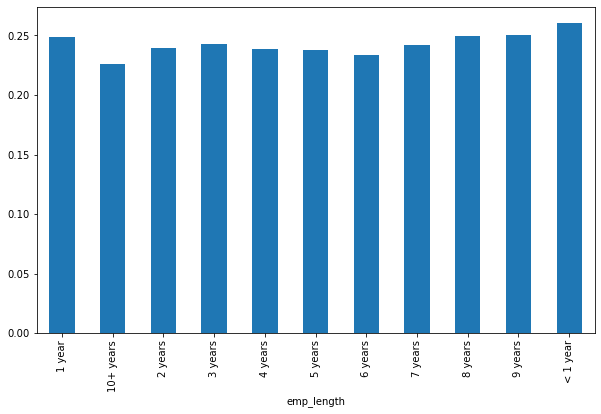

In [162]:
# visualize the ratio
emp_co_to_fp.plot(kind='bar',figsize=(10,6))
plt.show()

The ratios among the 'emp_length' seems similar to each other. There is no big difference, so we can drop the feature.

In [163]:
# drop the 'emp_length' column
df.drop('emp_length',axis=1,inplace=True)

In [164]:
# check the head of 'purpose'
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [165]:
# check the head of 'title'
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

We can see that this two features has similar information. We should drop one of them.

In [166]:
# drop 'title' column
df.drop('title',axis=1,inplace=True)

In [167]:
# check the counts of 'mort_acc'
df['mort_acc'].value_counts().head(10)

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
5.0     18194
6.0     11069
7.0      6052
8.0      3121
9.0      1656
Name: mort_acc, dtype: int64

In [168]:
# find the correlation between 'mort_acc' and another features
df.corr()['mort_acc'].sort_values(ascending=True)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

We can notice that 'total_acc' has the highest correlation to 'mort_acc'. The idea is fill the null value with the average 'mort_acc' value from each 'total_acc'.

In [169]:
# create the series that contain the average value of 'mort_acc' for each 'total_acc'
mort_acc_avg_by_total_acc = df.groupby('total_acc').mean()['mort_acc']

In [170]:
# create the function that fill the null value in 'mort_acc' column
def fill_na_mort_acc(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return round(mort_acc_avg_by_total_acc[total_acc],0)
    else:
        return mort_acc

In [171]:
# fill the null value with the function already created
df['mort_acc'] = df.apply(lambda x: fill_na_mort_acc(x['mort_acc'],x['total_acc']),axis=1)

We can drop the remaining null value because its percentage is not significant (less than 0.5%)

In [172]:
# drop the remaining null value
df.dropna(inplace=True)

In [173]:
# check if there any null value left
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Create the Dummies for Categorical Features

In [174]:
# check the features that has 'object' data type
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [175]:
# check the value counts of 'term'
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [176]:
# modify values in 'term' so it become numeric
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [177]:
# drop 'grade' because it is already detailed in 'sub_grade'
df.drop('grade',axis=1,inplace=True)

In [178]:
# check the value counts of 'home_ownership'
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We can group 'OTHER', 'NONE' and 'ANY' into one category.

In [179]:
# replace 'NONE' and 'ANY' into 'OTHER'
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [180]:
# check the value counts of 'address'
df['address'].value_counts().head(10)

USCGC Smith\nFPO AE 70466     8
USS Smith\nFPO AP 70466       8
USNS Johnson\nFPO AE 05113    8
USS Johnson\nFPO AE 48052     8
USNS Johnson\nFPO AP 48052    7
USCGC Smith\nFPO AA 70466     6
USNV Smith\nFPO AE 30723      6
USNS Johnson\nFPO AA 70466    6
USNV Brown\nFPO AA 48052      6
USNV Smith\nFPO AA 00813      6
Name: address, dtype: int64

Its look that there is some pattern in the address value. We can use the zip code instead of the full address. So, it would be numeric data type.

In [181]:
# create 'zip_code' and drop 'address'
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))
df.drop('address',axis=1,inplace=True)

In [182]:
# for the 'issue_d', it will existed after the loan_status decided, so it isn't relevant for the prediction, just drop the feature
df.drop('issue_d',axis=1,inplace=True)

In [183]:
# check the value counts of 'earliest_cr_line'
df['earliest_cr_line'].value_counts().head(5)

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
Name: earliest_cr_line, dtype: int64

In [228]:
# take only the year from 'earliest_cr_line'
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [185]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],
      dtype='object')

In [186]:
# create the dummies
dummies = pd.get_dummies(df[['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type']],drop_first=True)
df.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],axis=1,inplace=True)
df = pd.concat([df,dummies],axis=1)

In [ ]:
# is there any 'object' feature left
df.select_dtypes(['object']).columns

## Split and Scale the Data

In [189]:
# import the train_split from sklearn
from sklearn.model_selection import train_test_split

In [212]:
# define the feature and the label
X = df.drop('loan_status',axis=1).values
y = df['loan_status']

In [213]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
# import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [214]:
# create the scaler
scaler = MinMaxScaler()

In [215]:
# fit the scaler
scaler.fit(X_train)

MinMaxScaler()

In [216]:
# scale the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
# import the libraries that required to make deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [197]:
# check the shape to determine the number of the neuron
X_train.shape

(276653, 70)

In [217]:
# create the model
model = Sequential()

model.add(Dense(units=70,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=35,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=17,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [218]:
# create the early stopping contraint
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [219]:
# fit the model
model.fit(x=X_train,
         y = y_train,
         epochs=600,
          batch_size=256,
         validation_data=(X_test,y_test),
         verbose=1,
         callbacks=[early_stop])

Epoch 1/600
1081/1081 [==============================] - 4s 3ms/step - loss: 0.4502 - val_loss: 0.3675
Epoch 2/600
1081/1081 [==============================] - 2s 2ms/step - loss: 0.3796 - val_loss: 0.3613
Epoch 3/600
1081/1081 [==============================] - 3s 3ms/step - loss: 0.3701 - val_loss: 0.3590
Epoch 4/600
1081/1081 [==============================] - 3s 3ms/step - loss: 0.3640 - val_loss: 0.3504
Epoch 5/600
1081/1081 [==============================] - 3s 2ms/step - loss: 0.3471 - val_loss: 0.3051
Epoch 6/600
1081/1081 [==============================] - 2s 2ms/step - loss: 0.3094 - val_loss: 0.2842
Epoch 7/600
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2958 - val_loss: 0.2812
Epoch 8/600
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2942 - val_loss: 0.2809
Epoch 9/600
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2886 - val_loss: 0.2783
Epoch 10/600
1081/1081 [==============================] - 3s 2ms/step - l

In [220]:
# import load_model to save the trained model
from tensorflow.keras.models import load_model

In [221]:
# save the model
model.save('model.h5')  

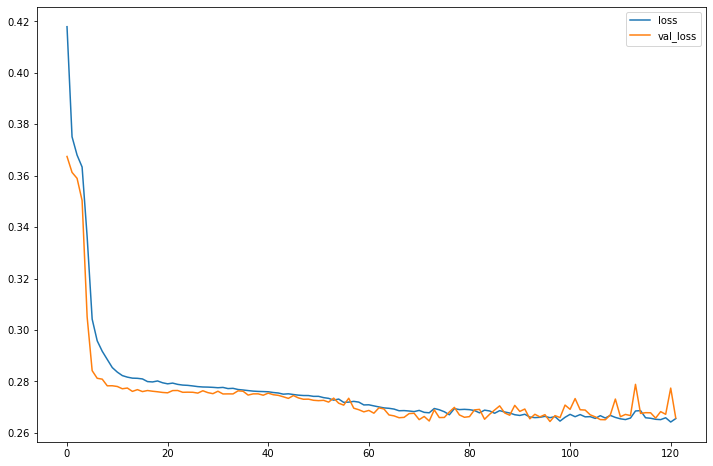

In [223]:
# plot the loss and validation loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,8))
plt.show()

In [224]:
# make a prediction
pred = model.predict_classes(X_test)

In [225]:
# print the model evaluation result
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 9957 13253]
 [   16 95340]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23210
           1       0.88      1.00      0.93     95356

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



Yeah, it is quite good. If you have extra time, you can perform any experiment int the model to get better result.

# Thank You!